In [26]:
import pandas as pd
import geopandas as gpd

party_replace = {
    'PARTI KEADILAN RAKYAT (PKR)': 'PAKATAN HARAPAN (PH)',
    'PARTI TINDAKAN DEMOKRATIK (DAP)': 'PAKATAN HARAPAN (PH)',
    'PARTI ISLAM SE MALAYSIA (PAS)': 'PERIKATAN NASIONAL (PN)',
    'IKATAN DEMOKRATIK MALAYSIA (MUDA)': 'PAKATAN HARAPAN (PH)'
}

df = pd.read_csv('data/candidates_ge15.csv',usecols=['state','parlimen','party','result'])
df = df[df.result == 1].drop('result',axis=1)
df['seats'] = 1
df.party = df.party.map(party_replace).fillna(df.party)
df.party = df.party.str.extract(r'\((\w+)\)')

sw = df[['party','seats']].groupby('party').sum()

af = pd.read_csv('data/census_parlimen.csv',usecols=['state','parlimen','area_km2']).rename(columns={'area_km2':'area'})

df = pd.merge(df.drop('seats',axis=1),af,on=['state','parlimen'],how='left').drop(['state','parlimen'],axis=1)
assert len(df[df.area.isnull()]) == 0, 'Missing data!' # ensure complete merge

df = df.groupby('party').mean().join(sw).reset_index()
df['party'] = df.party + '  (' + df.seats.astype(str) + ')'
df = df.set_index('party').sort_values(by='seats').drop('seats',axis=1)
df

,area
party,
KDM (1),2282.000000
PBM (1),2858.000000
BEBAS (2),2378.500000
WARISAN (3),3697.333333
GRS (6),2038.833333
GPS (23),5014.043478
BN (30),2188.500000
PN (74),1146.351351
PH (82),385.695122


PH  (82): 386.0 km^2
PN  (74): 1146.0 km^2
BN  (30): 2188.0 km^2
GPS  (23): 5014.0 km^2
GRS  (6): 2039.0 km^2
WARISAN  (3): 3697.0 km^2
BEBAS  (2): 2378.0 km^2
PBM  (1): 2858.0 km^2
KDM  (1): 2282.0 km^2


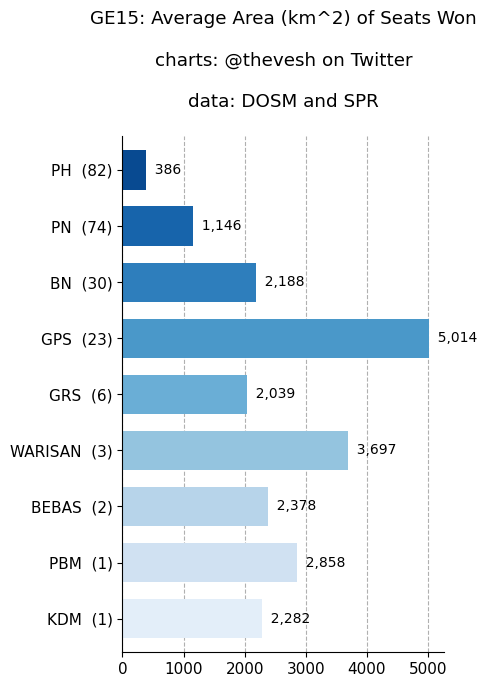

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

col_pos = sb.color_palette('Blues', n_colors=len(df)).as_hex()

plt.rcParams.update({'font.size': 11,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dashed'})
plt.rcParams["figure.figsize"] = [5,7]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df.plot(kind='barh', width=0.7, y='area', edgecolor='black', lw=0, color=col_pos, ax=ax)
ax.set_title(f'GE15: Average Area (km^2) of Seats Won\n\ncharts: @thevesh on Twitter\n\ndata: DOSM and SPR\n')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.get_legend().remove()
for c in ax.containers:
    labels = [f'  {h:0,.0f}' if (h := v.get_width()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels,fontsize=10)

for i in range(len(df)):
    print(f'{df.index[len(df)-i-1]}: {df["area"].iloc[len(df)-i-1].round(0)} km^2')